<a href="https://colab.research.google.com/github/Gadugcc/Hiperparametros_SVM/blob/main/Hiperpar%C3%A2metros_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
#Lendo a base de dados

df = pd.read_csv("/content/drive/MyDrive/Recursos Estudos Colab/Otimização parametros/housing.csv",sep=',',encoding='iso-8859-1')

df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos Previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietarios no bairro considerados de "classe baixa"

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro

**Variável Alvo**

MEDV: valor médio das casas

In [13]:
# tamanho do arquivo
df.shape

(489, 4)

# Exploração e tratamento dos dados

In [14]:
# Verificando se tem valor nulo
df.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


In [15]:
# Análise dos atributos
df.dtypes

,0
RM,float64
LSTAT,float64
PTRATIO,float64
MEDV,float64


# Análise dos tipos de atributos


In [16]:
import plotly.express as px

In [17]:
box = px.box(df,y='RM')
box.show()

In [18]:
box = px.box(df,y='LSTAT')
box.show()

In [19]:
box = px.box(df,y='PTRATIO')
box.show()

In [20]:
box = px.box(df,y='MEDV')
box.show()

## CORRELAÇÃO LINEAR

PEARSON (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)



In [21]:
import scipy.stats as stats

In [22]:
estatistica,p = stats.shapiro(df.MEDV)
print(f"Estatistica do teste {estatistica}")
print(f"Valor do p {p}")

Estatistica do teste 0.9596616055953767
Valor do p 2.5759801704018553e-10


In [23]:
estatistica,p = stats.shapiro(df.RM)
print(f"Estatistica do teste {estatistica}")
print(f"Valor do p {p}")

Estatistica do teste 0.9708170375303297
Valor do p 2.7090145811327798e-08


In [24]:
estatistica,p = stats.shapiro(df.LSTAT)
print(f"Estatistica do teste {estatistica}")
print(f"Valor do p {p}")

Estatistica do teste 0.9371757140975832
Valor do p 1.689879707182205e-13


In [25]:
estatistica,p = stats.shapiro(df.PTRATIO)
print(f"Estatistica do teste {estatistica}")
print(f"Valor do p {p}")

Estatistica do teste 0.90647424903615
Valor do p 9.064596547331122e-17


# Teste de Spearman - Para testar a linearidade

H0 - não há correlação linear p>0.05

HA - existe correlação linear p<=0.05

In [26]:
coef,p = stats.spearmanr(df.MEDV,df.RM)
print(f"Coeficiente de correlação {coef}")
print(f"Valor do p {p}")

Coeficiente de correlação 0.6240572939087418
Valor do p 3.845028634343325e-54


In [27]:
correlacoes = df.corr(method='spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


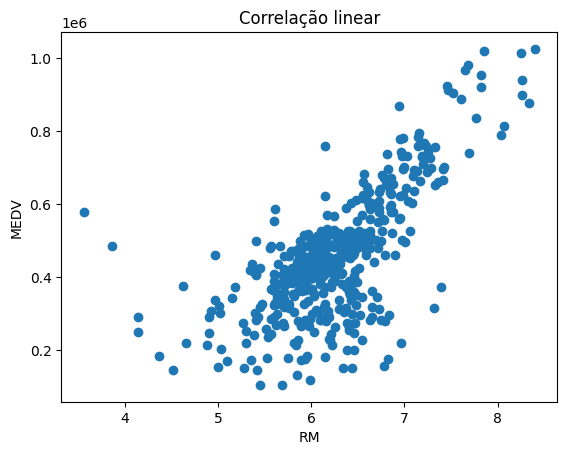

In [28]:
plt.scatter(df.RM,df.MEDV)
plt.title("Correlação linear")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

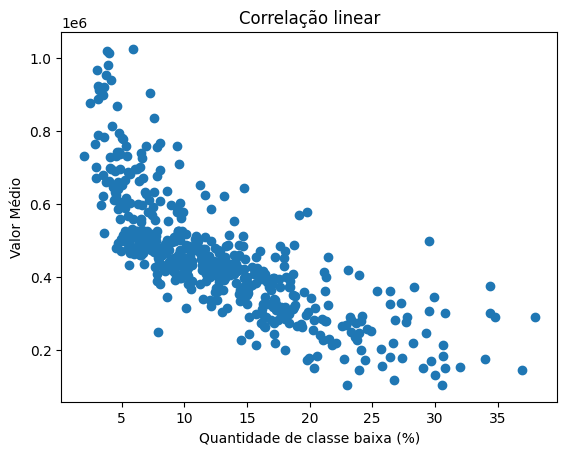

In [29]:
plt.scatter(df.LSTAT,df.MEDV)
plt.title("Correlação linear")
plt.xlabel("Quantidade de classe baixa (%)")
plt.ylabel("Valor Médio")
plt.show()

## PRÉ-PROCESSAMENTO

In [30]:
# Separação em variaveis depentendes e independete
independete = df.iloc[:,0:3].values
independete


array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [31]:
depedente = df.iloc[:,3].values
depedente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [32]:
# Divisão de dados em treino e teste

from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(independete,depedente,test_size=0.3,random_state=0)

In [33]:
x_treino.shape,x_teste.shape,y_treino.shape,y_teste.shape

((342, 3), (147, 3), (342,), (147,))

## SEM OTIMIZAR HIPERPARÂMETROS

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

In [35]:
desempenho_cross_val_score = cross_val_score(estimator=SVR(),
                                             X=x_treino,
                                             y=y_treino,
                                             cv=6,
                                             scoring="neg_root_mean_squared_error")
print(f"RMSE {desempenho_cross_val_score.mean()}")

RMSE -161381.60048800215


## PRINCIPAIS HIPERPARÂMETROS DE VETORES DE SUPORTE (SVR)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [37]:
param_grid = dict(
    kernel = ["linear","poly","rbf","sigmoid","precompute"],
    epsilon = [0.001,0.01,0.1,0.5,1,5],
    C = [0.25,0.50,0.75,1,2,10,100]
)

In [38]:
# Gerando o modelo
svr = SVR()

In [39]:
#Configurando a procura
grid_search = GridSearchCV(
    svr,
    param_grid,
    cv=6,
    scoring="neg_root_mean_squared_error",

)

In [40]:
# Configurando os melhores hiperparâmetros

grid_search.fit(x_treino,y_treino)

GridSearchCV(cv=6, estimator=SVR(),
             param_grid={'C': [0.25, 0.5, 0.75, 1, 2, 10, 100],
                         'epsilon': [0.001, 0.01, 0.1, 0.5, 1, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                    'precompute']},
             scoring='neg_root_mean_squared_error')

In [41]:
grid_search.best_params_

{'C': 100, 'epsilon': 0.001, 'kernel': 'linear'}

In [42]:
# RMSE do melhor modelo

print(f"RMSE do melhor modelo {grid_search.best_score_}")

RMSE do melhor modelo -99965.23058686707


In [43]:
# Relação dos dados para todos os modelos

resultados = pd.DataFrame(grid_search.cv_results_)
print(resultados.shape)
resultados.head()

(210, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004849,0.000948,0.001249,0.000252,0.25,0.001,linear,"{'C': 0.25, 'epsilon': 0.001, 'kernel': 'linear'}",-172327.520337,-149182.471359,-121456.204558,-207725.062912,-128755.202914,-178148.752603,-159599.202447,29824.327918,79
1,0.004225,0.000103,0.001095,0.000040,0.25,0.001,poly,"{'C': 0.25, 'epsilon': 0.001, 'kernel': 'poly'}",-172231.501140,-149327.727304,-121628.287052,-207857.827061,-128548.624075,-178078.980354,-159612.157831,29836.786688,85
2,0.004621,0.000049,0.001473,0.000017,0.25,0.001,rbf,"{'C': 0.25, 'epsilon': 0.001, 'kernel': 'rbf'}",-174218.058636,-150944.962660,-122815.811178,-209981.667562,-130516.731873,-179964.499183,-161406.955182,30058.124451,125
3,0.010258,0.004626,0.002310,0.000690,0.25,0.001,sigmoid,"{'C': 0.25, 'epsilon': 0.001, 'kernel': 'sigmo...",-174226.802292,-150953.970730,-122822.546532,-209992.507447,-130524.672560,-179972.217955,-161415.452919,30059.135528,139
4,0.000331,0.000079,0.000000,0.000000,0.25,0.001,precompute,"{'C': 0.25, 'epsilon': 0.001, 'kernel': 'preco...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169


In [44]:
#Ordenando os melhores resultados

resultados.sort_values(by="mean_test_score",ascending=False,inplace=True)
resultados.reset_index(inplace=True,drop=True)

resultados[["param_kernel","param_C","param_epsilon","mean_test_score","std_test_score"]].head()

,param_kernel,param_C,param_epsilon,mean_test_score,std_test_score
0,linear,100.0,0.001,-99965.230587,14426.232952
1,linear,100.0,0.010,-99965.232800,14426.234919
2,linear,100.0,0.100,-99965.254932,14426.254596
3,linear,100.0,0.500,-99965.353299,14426.342045
4,linear,100.0,1.000,-99965.476259,14426.451358


## RANDOM SEARCH

In [45]:
from scipy import stats
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [46]:
# Gerando o modelo

svr = SVR()

In [47]:
param_random = dict(
    kernel = ["linear","poly","rbf","sigmoid","precompute"],
    epsilon = stats.uniform(0,100),
    C=stats.uniform(0,100)
)


In [48]:
# Configurando a procura com o Random Search

random_search = RandomizedSearchCV(
    svr,
    param_random,
    n_iter=80,
    cv=6,
    scoring="neg_root_mean_squared_error",
    random_state=0
)

In [49]:
# Realizando o treinamento

random_search.fit(x_treino,y_treino)

RandomizedSearchCV(cv=6, estimator=SVR(), n_iter=80,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5573e89d50>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7e5573d6cf90>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid', 'precompute']},
                   random_state=0, scoring='neg_root_mean_squared_error')

In [50]:
# Melhores hiperparâmetros

random_search.best_params_

{'C': np.float64(96.36627605010293),
 'epsilon': np.float64(38.34415188257777),
 'kernel': 'linear'}

In [51]:
random_search.best_score_

np.float64(-100406.87701255381)

In [52]:
resultados = pd.DataFrame(random_search.cv_results_)
print(resultados.shape)
resultados.head()

(80, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009088,0.003131,0.002180,0.000622,54.881350,71.518937,sigmoid,"{'C': 54.88135039273247, 'epsilon': 71.5189366...",-174233.658281,-150951.545542,-122827.735039,-209989.267584,-130517.179808,-179983.896418,-161417.213779,30060.265981,54
1,0.006822,0.000514,0.001763,0.000198,85.794562,84.725174,sigmoid,"{'C': 85.79456176227568, 'epsilon': 84.7251738...",-174239.868985,-150954.648000,-122830.671818,-209993.835762,-130518.771128,-179990.504962,-161421.383442,30061.536865,58
2,0.003789,0.000160,0.001020,0.000022,64.589411,43.758721,linear,"{'C': 64.58941130666561, 'epsilon': 43.7587211...",-110672.195680,-97824.905908,-81172.832532,-130200.623915,-87985.461043,-105447.017358,-102217.172740,15967.105401,4
3,0.003998,0.000593,0.001043,0.000062,96.366276,38.344152,linear,"{'C': 96.36627605010293, 'epsilon': 38.3441518...",-107579.174766,-97220.729709,-80778.317119,-126008.920108,-87780.901949,-103073.218424,-100406.877013,14542.254449,1
4,0.003742,0.000163,0.001045,0.000046,39.278480,83.607876,linear,"{'C': 39.278479610082975, 'epsilon': 83.607876...",-113899.419455,-99771.740782,-81683.845984,-135845.148613,-88194.266150,-109136.717635,-104755.189770,17798.811397,12


In [53]:
#Ordenando os melhores resultados

resultados.sort_values(by="mean_test_score",ascending=False,inplace=True)
resultados.reset_index(inplace=True,drop=True)

resultados[["param_kernel","param_C","param_epsilon","mean_test_score","std_test_score"]].head()

,param_kernel,param_C,param_epsilon,mean_test_score,std_test_score
0,linear,96.366276,38.344152,-100406.877013,14542.254449
1,linear,95.715516,14.035078,-100466.433991,14552.565287
2,linear,79.369770,22.392469,-101316.096759,15085.239680
3,linear,64.589411,43.758721,-102217.172740,15967.105401
4,linear,58.201979,53.737323,-102932.551288,16623.476156


In [54]:
from sklearn.metrics import mean_squared_error
import numpy as np

modelo = random_search.best_estimator_


y_pred_treino = modelo.predict(x_treino)
y_pred_teste = modelo.predict(x_teste)

rmse_treino = np.sqrt(mean_squared_error(y_treino, y_pred_treino))
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_pred_teste))

print(f"RMSE (Treino): {rmse_treino:.2f}")
print(f"RMSE (Teste): {rmse_teste:.2f}")


RMSE (Treino): 99179.04
RMSE (Teste): 111159.15


# Otimização Baysiana

In [55]:
pip install scikit-optimize

In [56]:
from skopt.searchcv import BayesSearchCV

In [57]:
from skopt.space import Real, Categorical, Integer

In [60]:
# Definindo a otimização Bayesiana:
bayes_search = BayesSearchCV(estimator=SVR(),
                             search_spaces= {
                                 'kernel': Categorical(['linear', 'poly', 'rbf', 'sigmoid']),
                                 'epsilon': Real(0.001, 100, prior='log-uniform'),
                                 'C': Real(0.001, 10)
                             },scoring='neg_root_mean_squared_error',
                             cv=6,
                             n_iter=80)

In [61]:
# Realizando a otimização Bayesiana

bayes_search.fit(x_treino,y_treino)

BayesSearchCV(cv=6, estimator=SVR(), n_iter=80,
              scoring='neg_root_mean_squared_error',
              search_spaces={'C': Real(low=0.001, high=10, prior='uniform', transform='normalize'),
                             'epsilon': Real(low=0.001, high=100, prior='log-uniform', transform='normalize'),
                             'kernel': Categorical(categories=('linear', 'poly', 'rbf', 'sigmoid'), prior=None)})

In [62]:
bayes_search.best_params_

OrderedDict([('C', 10.0),
             ('epsilon', 32.17301905846113),
             ('kernel', 'linear')])

In [63]:
bayes_search.best_score_

np.float64(-121073.20334117883)